# Simulating lattice gauge theory with Rydberg atoms

In this example notebook, we will simulate a lattice gauge theory (LGD) with the Rydberg atoms

## Introduction 


## Adiabatic evolution

We begin by importing the necessary packages.

In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt

from braket.ahs.atom_arrangement import AtomArrangement


from braket.ahs.time_series import TimeSeries
from braket.ahs.driving_field import DrivingField
from braket.ahs.hamiltonian import Hamiltonian
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

from utils import show_register, show_global_drive, show_final_avg_density

from braket.analog_hamiltonian_simulator.rydberg.rydberg_simulator import RydbergAtomSimulator

## Preparign the initial state for the LGT dynamics

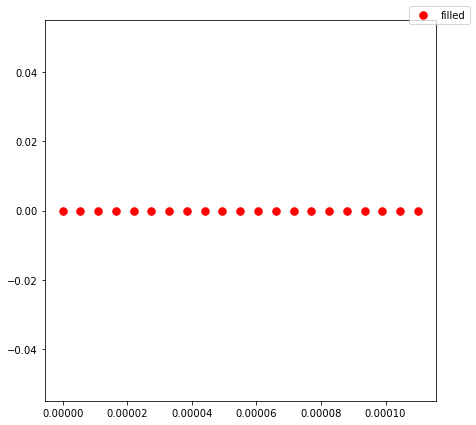

In [2]:
register = AtomArrangement()
separation = 5.5e-6  # in meters 
num_atoms = 21

for k in range(num_atoms):
    register.add((k*separation, 0))
    
show_register(register)

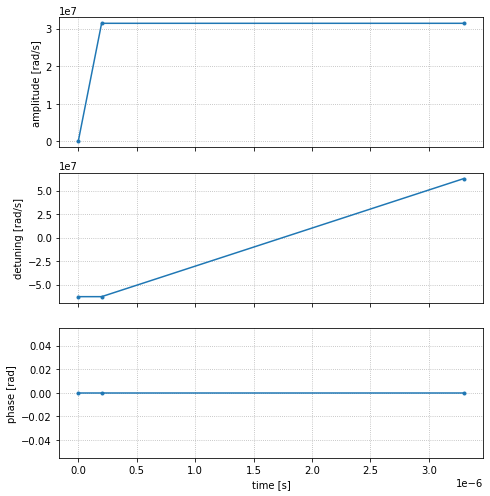

In [4]:
amplitude_min = 0       
amplitude_max = 10*pi*1e6

detuning_min = -20*pi*1e6
detuning_max = 20*pi*1e6

time_max = 3.5e-6
time_ramp = 0.2e-6

time_points = [0, time_ramp, time_max - time_ramp]
amplitude_values = [amplitude_min, amplitude_max, amplitude_max]
detuning_values = [detuning_min, detuning_min, detuning_max]
phase_values = [0, 0, 0, 0]

amplitude = TimeSeries()
for t, v in zip(time_points, amplitude_values):
    amplitude.put(t, v)

detuning = TimeSeries()
for t, v in zip(time_points, detuning_values):
    detuning.put(t, v)

phase = TimeSeries()
for t, v in zip(time_points, phase_values):
    phase.put(t, v)

# Note: Since all attributes of QuEra Aquila's driving field are uniform,
#       we pass the TimeSeries objects directly to the constructor.
#       This will contruct braket.ahs.field.Field objects with uniform patterns for the attributes.
drive = DrivingField(
    amplitude=amplitude, 
    detuning=detuning, 
    phase=phase
)
show_global_drive(drive)

In [5]:
hamiltonian = Hamiltonian()
hamiltonian += drive

ahs_program = AnalogHamiltonianSimulation(
    register=register, 
    hamiltonian=hamiltonian
)

ahs_program_ir = ahs_program.to_ir()

In [8]:
device = RydbergAtomSimulator()
result = device.run(ahs_program_ir, blockade_radius=separation, progress_bar=True)

The input program is being validated.



/Users/maolinml/opt/anaconda3/lib/python3.9/site-packages/braket/analog_hamiltonian_simulator/rydberg/validators/atom_array.py:36: UserWarning: Arrangement is too wide. Sites [Decimal('0.0'), Decimal('0')] and [Decimal('0.00010999999999999999'), Decimal('0')] have x-separation bigger than the typical scale (0.0001 meters). The coordinates of the atoms should be specified in SI units.
  warnings.warn(
/Users/maolinml/opt/anaconda3/lib/python3.9/site-packages/braket/analog_hamiltonian_simulator/rydberg/validators/field_validator_util.py:10: UserWarning: Value 1 (31415926.535897933) in amplitude sequence outside the typical range [0, 25000000.0]. The values should  be specified in SI units.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
show_final_avg_density(result)

## Propagation of particle-antiparticle pairs

In [ ]:
Delta_q = 0.0;
tq = pi/amplitude_max;

pattern_single_defect = [1 if idx==int(num_atoms/2) else 0 for idx in range(num_atoms)]
pattern_double_defects = [1 if idx==int(num_atoms/3)-1 or idx==int(num_atoms-num_atoms/3) else 0 for idx in range(num_atoms)]




shift_single_defect = ShiftingField(
    Field(
            TimeSeries().put(0.0, detuning_min).put(time_max, detuning_min),
            Pattern([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        )
)

